# 1 Load and dispaly the image 

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt  

In [2]:
# laod the image
img = cv.imread(r"Images\dahi.png")

cv.imshow("Original Image", img) # it will display the image

cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
# converting image into grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Grayscale Image", gray)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
# display the dimension of the original image
height, width, channels = img.shape

print("Image Height", height)
print("Image Width", width)
print("Number of channesl", channels)

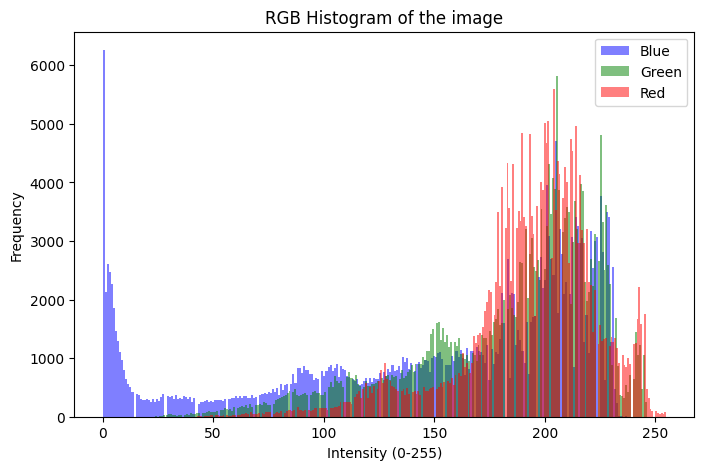

In [4]:
b, g, r = cv.split(img)

plt.figure(figsize=(8, 5))

# blue channel 
plt.hist(b.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')

#Green Channel 
plt.hist(g.ravel(), bins=256, color='green', alpha=0.5, label='Green')

# Red Channel
plt.hist(r.ravel(), bins=256, color='red', alpha=0.5, label='Red')

plt.title("RGB Histogram of the image")
plt.xlabel("Intensity (0-255)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

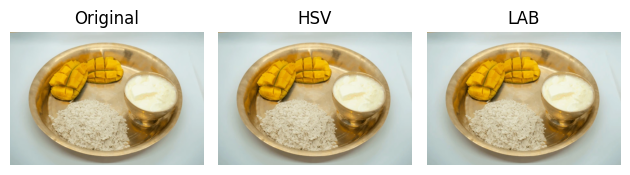

In [5]:
# converting to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Converting to LAB
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)

# converting bgr to rgb 
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
hsv_img = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)
lab_img = cv.cvtColor(lab, cv.COLOR_Lab2RGB)

# 1. Original 
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

# 2. HSV 
plt.subplot(1, 3, 2)
plt.imshow(hsv_img)
plt.title("HSV")
plt.axis('off')

# 3. LAB
plt.subplot(1, 3, 3)
plt.imshow(lab_img)
plt.title("LAB")
plt.axis('off')

plt.tight_layout()
plt.show()


# Gaussian Blur

In [6]:
# Applying Gaussian Blur
blur_3 = cv.GaussianBlur(img, (3,3), 0) # (3, 3)-> It means small blur
blur_5 = cv.GaussianBlur(img, (5, 5), 0)
blur_7 = (cv.GaussianBlur(img, (7,7), 0))

cv.imshow("Gaussian Blur 3 * 3", blur_3)
cv.imshow("Gaussian Blur 5 * 5", blur_5)
cv.imshow("Gaussian Blur 7 * 7", blur_7)

cv.waitKey(0)
cv.destroyAllWindows()


# Median Filter

In [7]:
# It is good for removing salt and pepper noise 
# It is better than gaussian blur beacause it removes noise without blurring edges too much 

median_5 = cv.medianBlur(img, 5) # it requires odd number, larger number = stronger noise removal
cv.imshow("Gaussian blur", blur_5)
cv.imshow("Median Blur 5 * 5", median_5)

cv.waitKey(0)
cv.destroyAllWindows()

# Bilateral Filter


In [8]:
# it is a special blur that smooths the image but keeps sharp edges
# its better than gaussian and median blur 

bilateral = cv.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)# d= how many pixels , sigmacolor = how much color chaneg while smoothed


cv.imshow("Gaussian Blur", blur_5)
cv.imshow("Bilateral Filter", bilateral)
cv.waitKey(0)
cv.destroyAllWindows()

# Edge Detection

In [9]:
# Sobel X = it helps to detects the vertical edges 
sobel_x = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobel_x = np.uint8(np.absolute(sobel_x))

# Sobel Y it helps to detects the horizontal edges
sobel_y = cv.Sobel(gray, cv.CV_64F, 0, 1)
sobel_y = np.uint8(np.absolute(sobel_y))

# Combine both
combined_sobel = cv.bitwise_or(sobel_x, sobel_y)

cv.imshow("Original", img)
cv.imshow("Sobel X (Vertical Edges)", sobel_x)
cv.imshow("Sobel Y (Horizontal Edges)", sobel_y)
cv.imshow("Combined Sobel", combined_sobel)

cv.waitKey(0)
cv.destroyAllWindows()



In [13]:
# Canny Edge Detection 

# Canny with different thresholds

canny1 = cv.Canny(gray, 50, 150)
canny2 = cv.Canny(gray, 100, 200)
canny3 = cv.Canny(gray, 150, 250)

cv.imshow("Original Image", img)
cv.imshow("Canny 50-150", canny1) # lower threshold = 50, upper threshold = 150
cv.imshow("Canny 100-200", canny2)
cv.imshow("Canny 150-250", canny3)

cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
# Laplacian Edge Detection 
# Laplacian detects edges by using the second derivative of the image.
# It finds areas where intensity changes sharply in all directions at once.

laplacian = cv.Laplacian(gray, cv.CV_64F) # 64F -> allows negative values 
laplacian = np.uint8(np.absolute(laplacian)) # convert to uint8 so we can display it 

cv.imshow("Original Image", img)
cv.imshow("Laplacian", laplacian)

cv.waitKey(0)
cv.destroyAllWindows()

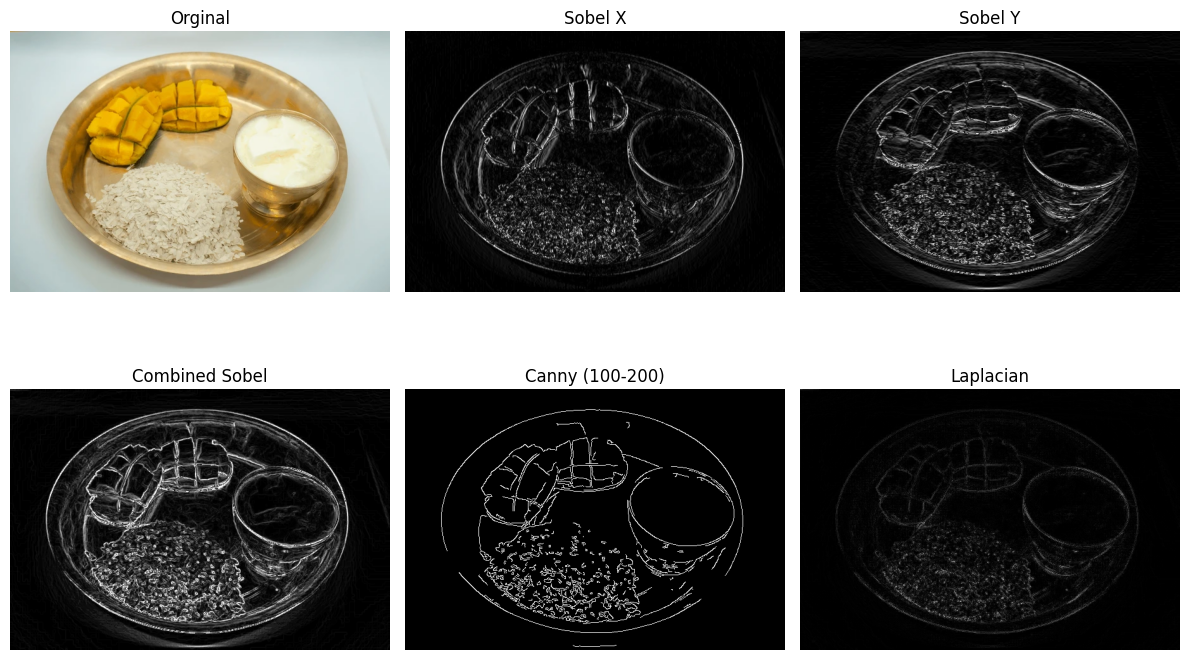

In [14]:
# comparision grid 

plt.figure(figsize=(12,8))

plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("Orginal")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(sobel_x, cmap="gray")
plt.title("Sobel X")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(sobel_y, cmap="gray")
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(combined_sobel, cmap="gray")
plt.title("Combined Sobel")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(canny2, cmap="gray")
plt.title("Canny (100-200)")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(laplacian, cmap="gray")
plt.title("Laplacian")
plt.axis("off")

plt.tight_layout()
plt.show()

# Morphological Operations

In [ ]:
# create Binary Image Using Thresholding

